In [166]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
def f1(x):
    return x**4

def f2(x):
    return x**3

def f3(x):
    return x**2

def f4(x):
    return x

def f5(x):
    return 1

In [168]:
def f_(eps, j):
    f = np.array([[f1(eps[0,j])],
                 [f2(eps[0,j])],
                 [f3(eps[0,j])],
                 [f4(eps[0,j])],
                 [f5(eps[0,j])]]) 
    return f

In [169]:
def M_eps(eps):

    M = 0
    
    for k in range(0, 5):
         M = M + eps[1,k]*(f_(eps, k).astype(float) @ f_(eps, k).astype(float).transpose())
         
    return M

In [170]:
eps1 = np.array([[-1,   -0.707, 0,      0.707, 1],
                 [0.093, 0.248, 0.3178, 0.248, 0.093]])

eps2 = np.array([[-1,   -0.683,  0,     0.683, 1],
                 [0.107, 0.25,   0.286, 0.25,  0.107]])

eps3 = np.array([[-1,    -0.7379,   0,      0.7379,  1],
                 [0.1092, 0.2513,   0.2785, 0.2513,  0.1092]])

eps4 = np.array([[-1, -0.7,  0,   0.7, 1],
                 [0.2, 0.2,  0.2, 0.2, 0.2]])

In [171]:
M1 = M_eps(eps1)

M2 = M_eps(eps2)

M3 = M_eps(eps3)

M4 = M_eps(eps4)

### вычисление критерия D-оптимальности ###

In [172]:
def Det(M):
    return np.linalg.det(M)

In [173]:
def D_opt(M1, M2, M3, M4):
    
    det_of_M = np.array([[Det(M1), 1],
                         [Det(M2), 2],
                         [Det(M3), 3],
                         [Det(M4), 4]])
                                          
    return det_of_M[det_of_M[:,0].argsort()][::-1]

In [174]:
D_opt(M1, M2, M3, M4)

array([[4.07510596e-05, 4.00000000e+00],
       [2.69296881e-05, 2.00000000e+00],
       [2.33199554e-05, 3.00000000e+00],
       [2.11380141e-05, 1.00000000e+00]])

#### D-оптимальный план  - $\varepsilon_4$

### вычисление критерия А-оптимальности

In [175]:
def A_opt(M1, M2, M3, M4):
   
    tr_of_D = np.array([[np.trace(np.linalg.inv(M1)), 1],
                        [np.trace(np.linalg.inv(M2)), 2],
                        [np.trace(np.linalg.inv(M3)), 3],
                        [np.trace(np.linalg.inv(M4)), 4]])

    return tr_of_D[tr_of_D[:,0].argsort()]

In [176]:
A_opt(M1, M2, M3, M4)

array([[188.80273155,   2.        ],
       [194.56083913,   1.        ],
       [201.72662904,   3.        ],
       [215.19180141,   4.        ]])

### A-оптимальный план - $\varepsilon_2$

### Вычисление критерия Е-оптимальности

In [177]:
def E_opt(M1, M2, M3, M4):
    
    min_eigenvalues = np.array([[np.amin(np.linalg.eig(M1)[0]), 1],
                                [np.amin(np.linalg.eig(M2)[0]), 2],
                                [np.amin(np.linalg.eig(M3)[0]), 3],
                                [np.amin(np.linalg.eig(M4)[0]), 4]])
    
    return min_eigenvalues[min_eigenvalues[:,0].argsort()][::-1]

In [178]:
E_opt(M1, M2, M3, M4)

array([[0.00775039, 1.        ],
       [0.00761468, 3.        ],
       [0.00754691, 2.        ],
       [0.00632982, 4.        ]])

#### E-оптимальный план - $\varepsilon_1$

### Вычисление критерия $\Phi_2$-оптимальности

In [179]:
def Phi_2(M):
    
    return 0.5*np.trace(np.linalg.matrix_power((np.linalg.inv(M)), 2))
    

In [180]:
def Phi_2_opt(M1, M2, M3, M4):
    
    Phi_values = np.array([[Phi_2(M1), 1],
                           [Phi_2(M2), 2],
                           [Phi_2(M3), 3],
                           [Phi_2(M4), 4]])
    
    return Phi_values[Phi_values[:,0].argsort()]

In [181]:
Phi_2_opt(M1, M2, M3, M4)

array([[9.97923715e+03, 2.00000000e+00],
       [1.00005808e+04, 1.00000000e+00],
       [1.05974302e+04, 3.00000000e+00],
       [1.37535666e+04, 4.00000000e+00]])


#### $\Phi_2$ -оптимальный план - $\varepsilon_2$

### Вычисление критерия MV-оптимальности

In [182]:
def D_ii_max(M):
    
    return np.amax(np.linalg.inv(M).diagonal())

In [183]:
def MV_opt(M1, M2, M3, M4):
    
    max_diag_values = np.array([[D_ii_max(M1), 1],
                                [D_ii_max(M2), 2],
                                [D_ii_max(M3), 3],
                                [D_ii_max(M4), 4]])
    
    return max_diag_values[max_diag_values[:,0].argsort()]

In [184]:
MV_opt(M1, M2, M3, M4)

array([[66.3446015 ,  1.        ],
       [67.77814   ,  3.        ],
       [70.41684694,  2.        ],
       [88.57260511,  4.        ]])

#### MV-оптимальный план - $\varepsilon_1$

### Вычисление критерия G-оптимальности

In [185]:
def max_d(eps):
   
    values_of_d = np.zeros(len(eps[0,:]))
    
    for k in range (0, len(eps[0,:])):
        values_of_d[k] = f_(eps, k).transpose()@ np.linalg.inv(M_eps(eps)) @ f_(eps, k)
    
    return np.amax(values_of_d)

In [186]:
def G_opt (eps1, eps2, eps3, eps4):
    
    d_max_values = np.array([[max_d(eps1), 1],
                             [max_d(eps2), 2],
                             [max_d(eps3), 3],
                             [max_d(eps4), 4]])
    
    return d_max_values[d_max_values[:,0].argsort()]
    

In [187]:
G_opt(eps1, eps2, eps3, eps4)

array([[ 5.        ,  4.        ],
       [ 9.15750916,  3.        ],
       [ 9.34579439,  2.        ],
       [10.75268817,  1.        ]])

#### G-оптимальный план - $\varepsilon_4$ 

### Вычисление критерия $\Lambda$-оптимальности

In [188]:
def L_func(M):
    
    return np.sum((np.linalg.eig(M)[0] - np.mean(np.linalg.eig(M)[0]))**2)

In [189]:
def L_opt(M1, M2, M3, M4):
    
    L_func_values = np.array([[L_func(M1), 1],
                              [L_func(M2), 2],
                              [L_func(M3), 3],
                              [L_func(M4), 4]])
    
    return L_func_values[L_func_values[:,0].argsort()]

In [190]:
L_opt(M1, M2, M3, M4)

array([[1.30069764, 1.        ],
       [1.35504314, 2.        ],
       [1.56610729, 3.        ],
       [2.3196154 , 4.        ]])

#### $\Lambda$-оптимальный критерий - $\varepsilon_1$

In [191]:
q = 0.07
q +  0.25 - 0.5*q + 0.5 - q + 0.25 - 0.5*q + q

1.0

### Построение $\Phi_2$-оптимального плана 

### Предположим, что $\Phi_2$-оптимальный план принадлежит классу планов следующего вида

### $\varepsilon= \begin{Bmatrix}
-1  & -0.707 & 0 & 0.707 & 1\\
q  &  0.25 - 0.5q &  0.5 - q & 0.25 - 0.5q & q
\end{Bmatrix}$

In [192]:
q =  np.linspace(0.01, 0.1, num = 21)


In [193]:
def eps_a (q):
    return np.array([[-1,   -0.707, 0,      0.707, 1],
                     [q, 0.25 - 0.5*q, 0.5 - q, 0.25 - 0.5*q, q]])

In [194]:
def Phi_2_a(q):
    
    Phi_2_an_value = np.zeros(len(q))
    
    for k in range (0, len(q)):
        Phi_2_an_value[k] = Phi_2(M_eps(eps_a(q[k])))
    
    return Phi_2_an_value

In [195]:
Phi_2_a(q)

array([94169.1448108 , 53318.87754798, 36694.21354255, 28137.14200983,
       23087.07025832, 19830.10644421, 17596.62045379, 15995.92341397,
       14811.02970213, 13912.83666844, 13220.23458557, 12679.97118629,
       12255.79145164, 11922.25210778, 11661.03421039, 11458.65804694,
       11305.01903342, 11192.42204696, 11114.92811823, 11067.90242402,
       11047.69527141])

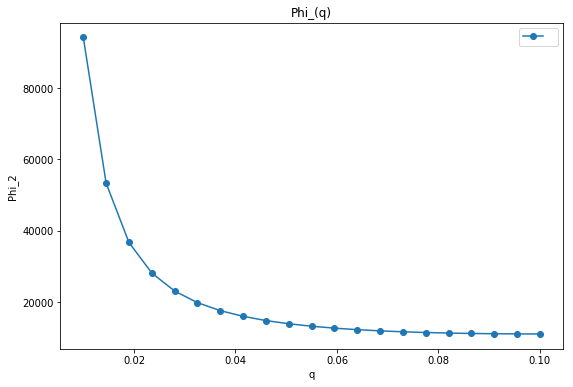

In [208]:
plt.figure(figsize=(9,6))
plt.plot(q, Phi_2_a(q), label=' ', marker = 'o')

plt.xlabel('q')
plt.ylabel('Phi_2')

plt.title("Phi_(q)")

plt.legend()

plt.show()

### Результат соответствует плану $\varepsilon_3$ при условии, что $\Phi_2$-оптимальный план принадлежит указанному выше классу 

### $\Phi_2(q) = 11047.695271407674 \quad q = 0.1$
